In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import numpy as np

def my_convolve2d(image, temp):
    """
    Perform a 2D convolution between an image and a template.
    Implements convolution with zero padding.

    Parameters:
    image: 2D numpy array representing the grayscale image.
    temp : 2D numpy array representing the template (kernel).

    Returns:
    2D numpy array representing the convolved image.
    """

    # Flip the template (convolution operation)
    temp = np.flipud(np.fliplr(temp))

    # Get image and template dimensions
    iH, iW = image.shape
    kH, kW = temp.shape

    # Calculate padding size (assuming odd kernel size)
    pad_h = kH // 2
    pad_w = kW // 2

    # Pad the image with zeros
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode="constant", constant_values=0)

    # Initialize the output image
    output = np.zeros((iH, iW), dtype=np.float64)

    # Perform convolution
    for i in range(iH):
        for j in range(iW):
            # Extract the region of the padded image
            region = padded_image[i:i+kH, j:j+kW]

            # Compute the convolution sum
            output[i, j] = np.sum(region * temp)

    # Return after all iterations are complete ✅
    return output


In [2]:
def gaussian_kernel(kernel_size, sigma):
  """
  Return a Gaussian kernel of appropriate size.
  The kernel is of wxw, where w=2*int(3*sigma)+1.
  Coefficients are normalized to sum to 1.

  Input:
    Sigma:mkernel_size = 2 * int(3 * sigma) + 1
    {Why this formula?
A Gaussian distribution extends infinitely, but ~99.7% of its energy lies within ±3σ (3 standard deviations from the mean). The kernel size is chosen to capture this range:

3 * sigma: Number of pixels covered on one side of the center.

2 * int(3 * sigma): Accounts for both sides (left and right of the center).

+1: Ensures the kernel has an odd size (so there’s a well-defined center pixel).

Example: If sigma = 2, the kernel size is 2*int(6) + 1 = 13, resulting in a 13×13 kernel}

Output:
kernel: A 2D numpy array of size wxw
  """

  #Determine kernel_size: Use 3 std on each side.
  kernel_size = 2 * int(3*sigma) + 1
  center = kernel_size //2
  #Create a coordinate grid(Centered at zero)
  x = np.arange(kernel_size) - center
  y = np.arange(kernel_size) - center
  xx, yy = np.meshgrid(x, y)

  #Compute the Gaussian function
  kernel = np.exp(-(xx*2 + yy*2)/(2*sigma**2))
  #Normalize the kernel so that its sum is 1.
  kernel = kernel/kernel.sum()

  return kernel

In [3]:
def temp_sad(image, temp):
  """
  Template Matching using Sum of Absolute differences(SAD).

  Inputs:
    Image: The main image(HXW, Grayscale)
    temp: The template image(HXW, grayscale)

  output:
  (tx, ty): coordinates(column, row) of the top left corner of the best match.
  """

  H, W = image.shape
  h,w = temp.shape
  best_cost = np.inf # Initialize to infinity; lower cost is better
  best_x, best = 0,0

  #slide the template over every possible position in the image
  for i in range(H - h + 1):
    for j in range(W - w + 1):
      #Extract candidate region from the image
      candidate = image[i:i+h, j:j+w]
      #Compute SAD
      cost = np.sum(np.abs(candidate - temp))
      if cost < best_cost:
        best_cost = cost
        best_x, best_y = i, j #(X and Y coordinate)

        print('Found template at(' + repr(best_x) + ',' + repr(best_y)+')with cost' + repr(best_cost))

  return best_x, best_y


In [4]:

def temp_ncc(image, temp):
  """
  Template matching using Normalized Cross correlation(NCC).

  Inputs:
  Image: the main image(H,W, grayscale)
  temp: the temp image(h, w, grayscale)

  output:
  (tx, ty): coordinates of top-left corner of the best match.
  """

  H, W = image.shape
  h, w = temp.shape
  best_score = -np.inf
  best_x, best_y = 0, 0

  # Precompute statistics for the template
  T_mean = np.mean(temp)
  T_std = np.std(temp)
  # To avoid division by zero, ensure T_std is not zero.
  if T_std == 0:
      T_std = 1e-10

  #Slide the template over every possible position
  for i in range(H - h +1):
    for j in range(W - w +1):
      #Extract candidate region from the image
      candidate = image[i:i+h, j:j+w]
      I_mean = np.mean(candidate)
      I_std = np.std(candidate)
      if I_std==0:
        I_std = 1e-10
      #compute the numerator
      numerator = np.sum((temp - T_mean)* (candidate - I_mean))
      #compute the denominator
      denominator = np.sqrt(np.sum((temp - T_mean)**2) * np.sum((candidate - I_mean)**2))
      score = numerator/denominator
      if score > best_score:
        best_score = score
        best_x = j #column coordinate
        best_y = i #row coordinate

        print('Found template at(' + repr(best_x) + ',' + repr(best_y)+')with score' + repr(best_score))

  return best_x, best_y






In [5]:
def imshow(image, *args, **kwargs):
  """
  Display an image using matplotlin.
  Converts BGR images (or grayscale) to RGB for correct display.
  Why Use *args?
  When the number of inputs is unknown.
  **kwargs allows you to pass named arguments (key-value pairs).
  """
  if len(image.shape) ==3:
    #Convert BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  else:
    #conver Grayscale to RGB
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    plt.imshow(image, *args, **kwargs)
    plt.axis('off')
    plt.show()

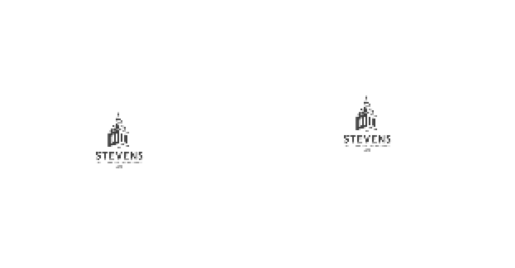

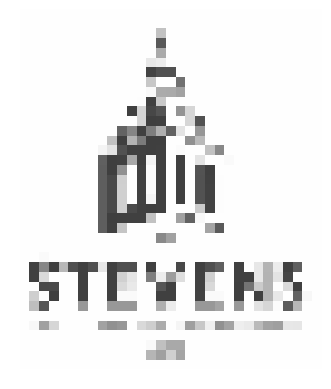

Found template at(0,0)with costnp.uint64(29625)
Found template at(50,200)with costnp.uint64(958)


<ipython-input-4-6ab4a68ad3d7>:38: RuntimeWarning: invalid value encountered in scalar divide
  score = numerator/denominator


Found template at(184,15)with scorenp.float64(-0.012512608037785042)
Found template at(206,15)with scorenp.float64(-0.012512608037785039)
Found template at(208,15)with scorenp.float64(-0.012512608037785037)
Found template at(198,17)with scorenp.float64(-0.004934810718193585)
Found template at(200,17)with scorenp.float64(-0.004295746432247575)
Found template at(198,18)with scorenp.float64(0.030672664118365115)
Found template at(200,24)with scorenp.float64(0.031882043325786)
Found template at(195,30)with scorenp.float64(0.03375445492731361)
Found template at(204,32)with scorenp.float64(0.03424137031006128)
Found template at(195,33)with scorenp.float64(0.03978303625593941)
Found template at(200,33)with scorenp.float64(0.05225994579906796)
Found template at(195,34)with scorenp.float64(0.09673051313091771)
Found template at(195,36)with scorenp.float64(0.10237508060225009)
Found template at(196,36)with scorenp.float64(0.114301787942731)
Found template at(194,37)with scorenp.float64(0.1444189

(200, 50)

In [8]:
# Load images: the template and the input image.
temp_image = cv2.imread(os.path.join( "/content/logo38.png"))
input_image = cv2.imread(os.path.join("/content/match_clean.png"))

# Convert images to grayscale (even if the PNG is loaded as 3-channel).
temp_image = cv2.cvtColor(temp_image, cv2.COLOR_BGR2GRAY)
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

#Display the images.
imshow(input_image)
imshow(temp_image)

#Run template matching SAD and NCC
temp_sad(input_image, temp_image)
temp_ncc(input_image, temp_image)

PROBLEM 2: Multi Scale Template Matching

In [9]:
#Load the small Template
smalltempl_image = cv2.imread(os.path.join('/content/logo38.png'), cv2.IMREAD_GRAYSCALE)

#Load the Background Image
map_image = cv2.imread(os.path.join('/content/multiscale.png'), cv2.IMREAD_GRAYSCALE)

#Function to display images
def imshow(image, title="Main Image"):
  plt.imshow(image, cmap='gray')
  plt.title(title)
  plt.show()

  #show images
  imshow(map_image, "Multiscale Image")
  imshow(smalltempl_image, "Small Template")


In [10]:
#Run template matching SAD and NCC
temp_sad(map_image, smalltempl_image)
temp_ncc(map_image, smalltempl_image)

Found template at(0,0)with costnp.uint64(262723)
Found template at(0,2)with costnp.uint64(262607)
Found template at(0,53)with costnp.uint64(262600)
Found template at(0,57)with costnp.uint64(262139)
Found template at(0,75)with costnp.uint64(261877)
Found template at(0,86)with costnp.uint64(261222)
Found template at(0,89)with costnp.uint64(260592)
Found template at(0,90)with costnp.uint64(260390)
Found template at(0,91)with costnp.uint64(259873)
Found template at(0,95)with costnp.uint64(259283)
Found template at(0,96)with costnp.uint64(258311)
Found template at(0,97)with costnp.uint64(257021)
Found template at(0,101)with costnp.uint64(256582)
Found template at(0,106)with costnp.uint64(256058)
Found template at(0,287)with costnp.uint64(255828)
Found template at(0,288)with costnp.uint64(254550)
Found template at(0,289)with costnp.uint64(253805)
Found template at(0,290)with costnp.uint64(253319)
Found template at(0,291)with costnp.uint64(252604)
Found template at(0,295)with costnp.uint64(25

<ipython-input-4-6ab4a68ad3d7>:38: RuntimeWarning: invalid value encountered in scalar divide
  score = numerator/denominator


(100, 320)

In [11]:
# Find the first best match
best_match = temp_ncc(map_image, smalltempl_image)

# Mask the first match location by setting the region to zero
result = cv2.matchTemplate(map_image, smalltempl_image, cv2.TM_CCOEFF_NORMED)
cv2.rectangle(result, best_match, (best_match[0] + smalltempl_image.shape[1], best_match[1] + smalltempl_image.shape[0]), 0, thickness=-1)

# Find second-best match
second_best_match = temp_ncc(result, smalltempl_image)

print("First small-scale match at:", best_match)
print("Second small-scale match at:", second_best_match)



Found template at(0,0)with scorenp.float64(0.13915724233291685)
Found template at(1,0)with scorenp.float64(0.15730914895612189)
Found template at(2,0)with scorenp.float64(0.16125257260973938)
Found template at(6,0)with scorenp.float64(0.16519484418071465)
Found template at(109,0)with scorenp.float64(0.16677367762445466)
Found template at(113,0)with scorenp.float64(0.17863719931590208)
Found template at(235,0)with scorenp.float64(0.18259975851647386)
Found template at(280,0)with scorenp.float64(0.20402844384135305)
Found template at(399,0)with scorenp.float64(0.21903255103902763)
Found template at(345,1)with scorenp.float64(0.22216418821489411)
Found template at(346,1)with scorenp.float64(0.228410875072849)
Found template at(396,1)with scorenp.float64(0.23000783694029606)
Found template at(399,1)with scorenp.float64(0.26324890823390557)
Found template at(293,21)with scorenp.float64(0.26937090764998944)
Found template at(407,54)with scorenp.float64(0.2700063629565237)
Found template at(5

<ipython-input-4-6ab4a68ad3d7>:38: RuntimeWarning: invalid value encountered in scalar divide
  score = numerator/denominator


Found template at(0,0)with scorenp.float64(0.19092762799648386)
Found template at(27,0)with scorenp.float64(0.20282083081395866)
Found template at(28,0)with scorenp.float64(0.23278206926843387)
Found template at(29,0)with scorenp.float64(0.25699333617158127)
Found template at(30,0)with scorenp.float64(0.2572871262530255)
Found template at(33,0)with scorenp.float64(0.2593299472701189)
Found template at(65,0)with scorenp.float64(0.2668386941817836)
Found template at(66,0)with scorenp.float64(0.27045332786306836)
Found template at(228,0)with scorenp.float64(0.2743187705876334)
Found template at(292,0)with scorenp.float64(0.2948675327496139)
Found template at(293,0)with scorenp.float64(0.3226585902341344)
Found template at(294,0)with scorenp.float64(0.3331521191535472)
Found template at(422,0)with scorenp.float64(0.34510771386423883)
Found template at(184,17)with scorenp.float64(0.361543837045267)
Found template at(184,18)with scorenp.float64(0.36559338255163076)
Found template at(218,48)w

In [12]:
kernel = gaussian_kernel(kernel_size=5, sigma=1)
print(kernel)


[[4.00306132e-01 1.47264396e-01 5.41755437e-02 1.99300688e-02
  7.33186256e-03 2.69724150e-03 9.92259696e-04]
 [1.47264396e-01 5.41755437e-02 1.99300688e-02 7.33186256e-03
  2.69724150e-03 9.92259696e-04 3.65031942e-04]
 [5.41755437e-02 1.99300688e-02 7.33186256e-03 2.69724150e-03
  9.92259696e-04 3.65031942e-04 1.34287747e-04]
 [1.99300688e-02 7.33186256e-03 2.69724150e-03 9.92259696e-04
  3.65031942e-04 1.34287747e-04 4.94017013e-05]
 [7.33186256e-03 2.69724150e-03 9.92259696e-04 3.65031942e-04
  1.34287747e-04 4.94017013e-05 1.81738703e-05]
 [2.69724150e-03 9.92259696e-04 3.65031942e-04 1.34287747e-04
  4.94017013e-05 1.81738703e-05 6.68579324e-06]
 [9.92259696e-04 3.65031942e-04 1.34287747e-04 4.94017013e-05
  1.81738703e-05 6.68579324e-06 2.45956588e-06]]


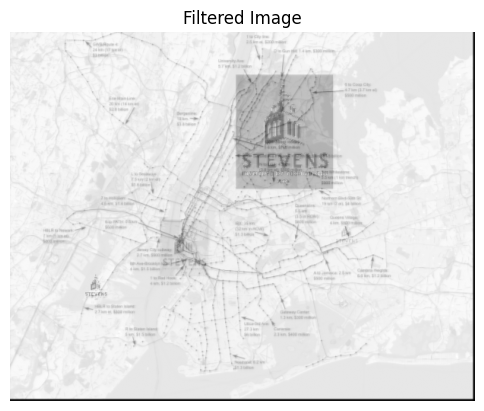

In [13]:
# Apply convolution once
filtered_map = my_convolve2d(map_image, kernel)

# Display only one image
plt.figure(figsize=(6, 6))
plt.imshow(filtered_map, cmap='gray')
plt.title("Filtered Image")
plt.axis("off")
plt.show()


In [14]:
# Resize templates for multi-scale matching
medium_template = cv2.resize(smalltempl_image, (smalltempl_image.shape[1]*2, smalltempl_image.shape[0]*2), interpolation=cv2.INTER_LINEAR)
large_template = cv2.resize(smalltempl_image, (smalltempl_image.shape[1]*4, smalltempl_image.shape[0]*4), interpolation=cv2.INTER_LINEAR)

# Perform template matching at different scales
medium_match = temp_ncc(filtered_map, medium_template)
large_match = temp_ncc(filtered_map, large_template)

print("Medium-scale match at:", medium_match)
print("Large-scale match at:", large_match)


Found template at(0,0)with scorenp.float64(-0.03941174530947808)
Found template at(1,0)with scorenp.float64(-0.02034413924107286)
Found template at(2,0)with scorenp.float64(-0.008848449695605897)
Found template at(11,0)with scorenp.float64(-0.005631620778725007)
Found template at(12,0)with scorenp.float64(0.014705980455584305)
Found template at(13,0)with scorenp.float64(0.042028087446015785)
Found template at(14,0)with scorenp.float64(0.06321004461678989)
Found template at(15,0)with scorenp.float64(0.06618486299623498)
Found template at(41,0)with scorenp.float64(0.07037703122779095)
Found template at(42,0)with scorenp.float64(0.08679739952903075)
Found template at(43,0)with scorenp.float64(0.08720734476848903)
Found template at(79,0)with scorenp.float64(0.08887210278034764)
Found template at(80,0)with scorenp.float64(0.10644828442417568)
Found template at(81,0)with scorenp.float64(0.11955096330690422)
Found template at(82,0)with scorenp.float64(0.1263013326873558)
Found template at(168

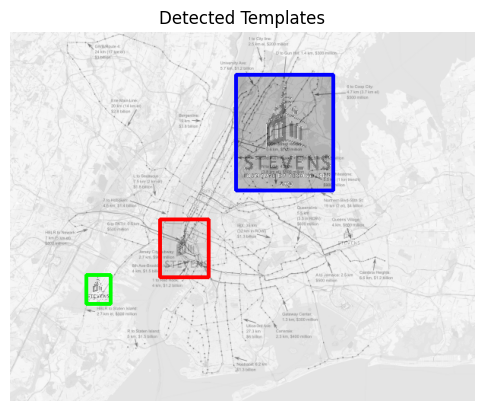

In [15]:
def draw_rectangle(image, top_left, template_size, color=(255, 0, 0)):
    """
    Draws a rectangle around the matched template in the image.
    """
    h, w = template_size
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(image, top_left, bottom_right, color, 3)

# Convert image to RGB for visualization
output_image = cv2.cvtColor(map_image, cv2.COLOR_GRAY2BGR)

# Draw matches
draw_rectangle(output_image, best_match, smalltempl_image.shape, (0, 255, 0))  # First small
draw_rectangle(output_image, medium_match, medium_template.shape, (255, 0, 0))  # Medium
draw_rectangle(output_image, large_match, large_template.shape, (0, 0, 255))  # Large

# Display only one image
plt.figure(figsize=(6, 6))
plt.imshow(output_image, cmap='gray')
plt.title("Detected Templates")
plt.axis("off")
plt.show()

